# NIAID DATA HUB: CHARLIE (MACS/WIHS) Data Analysis

## Data Exploration using GraphQL queries (Python library)

GraphQL queries can be used as a baseline to create high-level libraries and explore the metadata in BHC. The Python library created for this data analysis can be accessed from:

https://github.com/uc-cdis/ndh-demo/blob/master/demo/ndh_analysis_functions.py

In [1]:
%matplotlib inline
import ndh_analysis_functions as ndh
ndh.add_keys('niaid_fortuno.json')
project_id = "ndh-CHARLIE"

### Get summary metrics for each data type in the data model:

In [2]:
ndh.query_summary_counts(project_id)

Studies,2
Cases,12337
Demographic records,12337
HIV History records,12337
Visit records,248891
Socio-Demographic records,207189
Lab Results records,209950
AIDS Drug records,127694


### Get summary counts for one specific variable:

Visualize the counts we get for the HIV status variable:

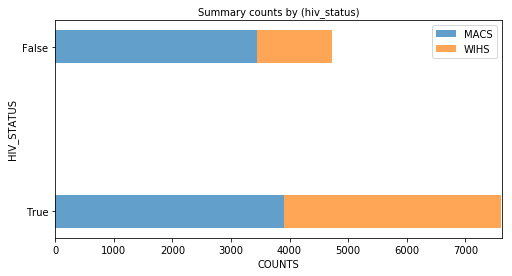

In [3]:
summary = ndh.query_summary_field(project_id, "subject", "hiv_status")

## CHARLIE SCIENTIFIC USER CASES

The following part of the demo is focused on answering some specific scientific questions based on the data currently available at the **NIAID Data Hub**

### **Scientific User Case 1:** Is the number of CD4 positive cells significantly different immediately after seropositive conversion?

Compare the values for the **number of CD4 positive cells** between the last seronegative visit and the first seropositive visit. A **Wilcoxon rank-sum test** is applied to determine statistically significant differences. 

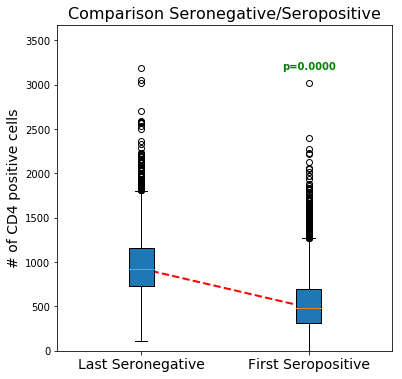

In [4]:
values = ndh.compare_lab_results(project_id, "leu3n", "# of CD4 positive cells")

### **Scientific User Case 2:** Is the viral load significantly different immediately after seropositive conversion?

Compare the values for the **viral load** between the last seronegative visit and the first seropositive visit. A **Wilcoxon rank-sum test** is applied to determine statistically significant differences.

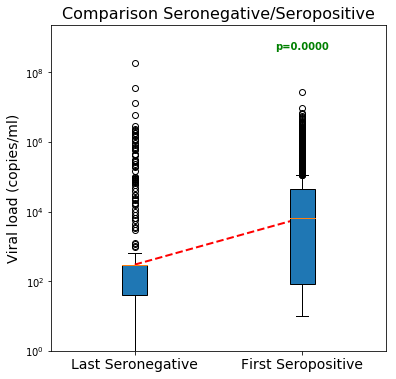

In [5]:
values = ndh.compare_lab_results(project_id, "viral_load", "Viral load (copies/ml)")

### Scientific User Case 3: Are viral load and CD4+ cells controlled when subject are HAART treated?

Compare the values for the **viral load** and **CD4 positive cells** across the time in different visits to visualize the effect of HAART treatment. We compare values before/after first HAART treatment as well as 1, 2 and 3 years after that. A **Wilcoxon rank-sum test** is applied to determine statistically significant differences.

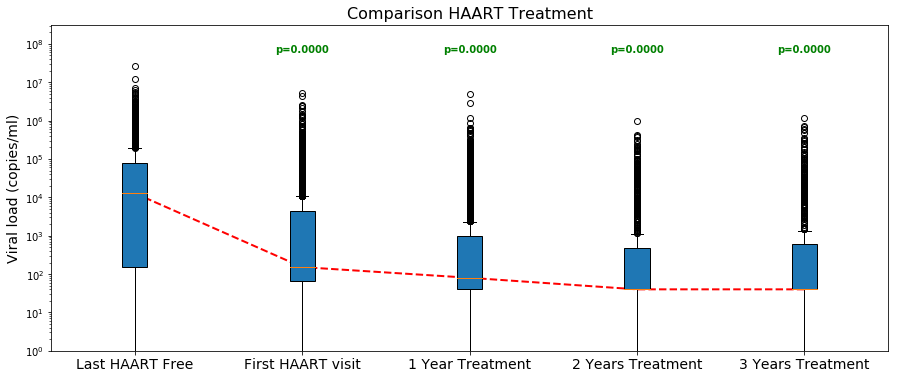

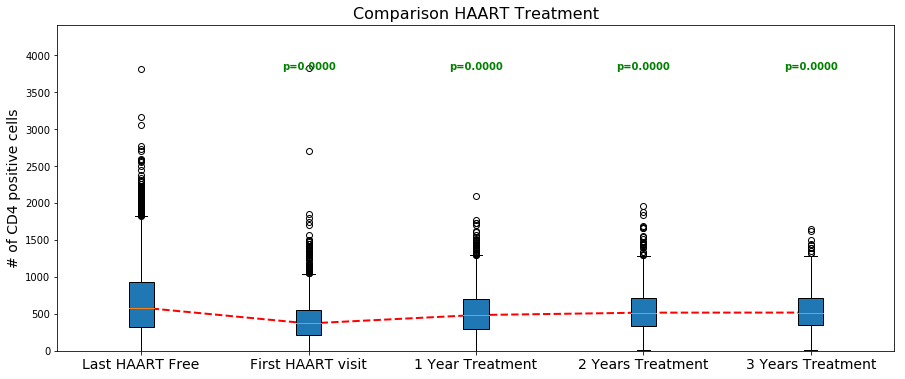

In [6]:
values = ndh.compare_after_haart(project_id, "viral_load", "Viral load (copies/ml)")
values = ndh.compare_after_haart(project_id, "leu3n", "# of CD4 positive cells")

### Scientific User Case 4: How survival change when using HAART treatment?

Determine the **Kaplan-Meier survival curves** under the condition of **ever had HAART treatment**. Survival time is calculated as the different (in years) between first year seen seropositive and year of death (if vital status is not *Alive*).

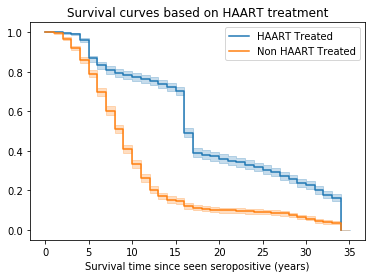

In [7]:
values = ndh.compare_survival(project_id, "ehaart", "Survival curves based on HAART treatment")